In [206]:
sales =pd.read_csv('C:/Users/msingh/Desktop/sales_test.csv')
cancel =pd.read_csv('C:/Users/msingh/Desktop/canceled_test.csv')

In [234]:
def ABC_segmentation(perc):
    if perc > 0 and perc < 0.80:
        return 'A'
    elif perc >= 0.8 and perc < 0.95:
        return 'B'
    elif perc >= 0.95:
        return 'C'

In [237]:
Groupby_qty = sales['Order Qty'].groupby(sales['Item Code'], sort = True).sum()
Value_Series = pd.DataFrame(Groupby_qty.sort_values(ascending  = False))
Value_Series = Value_Series.cumsum()/Value_Series.sum()
cumsumavg =  [x[0] for x in Value_Series.values.tolist()]
#sales[class] = sales[Value_Series].apply(ABC_segmentation)
classified = pd.DataFrame(["A" if x[0] < 0.8 else "B" if ((x[0] > 0.8) and (x[0] < 0.95)) else "C" for x in Value_Series.values.tolist()])

In [238]:
classified.index = Value_Series.index
classified.columns = ['value']

In [239]:
print(classified.head())


          value
Item Code      
10098739      A
111931        A
1041106       A
1040765       A
110441        A


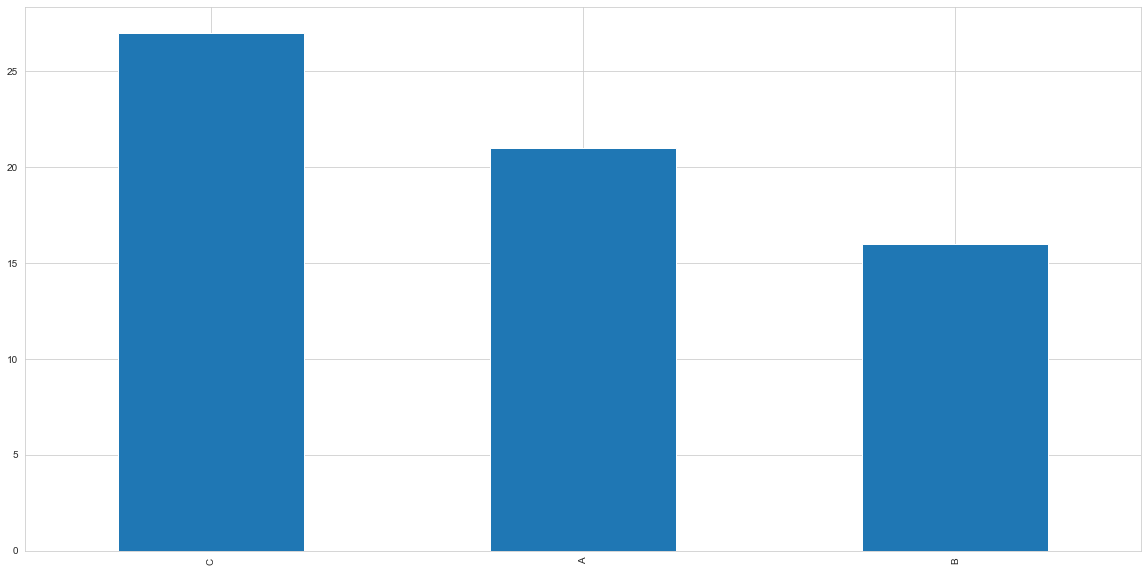

In [244]:
classified['value'].value_counts().plot(kind='bar')

In [235]:
data_sub['Perc'].apply(ABC_segmentation)

827      A
10493    A
22125    A
10492    A
955      A
        ..
14101    C
14100    C
14098    C
14096    C
14157    C
Name: Perc, Length: 28315, dtype: object

In [236]:
data_sub.Class.value_counts()

B    13628
C    10758
A     3929
Name: Class, dtype: int64

In [208]:
# take a subset of the data, we need to use the price and the quantity of each item
sales['cancelled'] = cancel['Quantity Canceled']
sales = sales.fillna(0)
daily.plot()

In [211]:
data_sub = sales[['Order No','Order Date','Ship To Address No','Item Code','Quantity Shipped','cancelled']]

In [212]:
data_sub['Total'] = data_sub['Quantity Shipped'] + data_sub['cancelled']

C:\Users\msingh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [214]:
data_sub = data_sub.sort_values(by=['Total'], ascending=False)

In [215]:
data_sub['RunCumCost'] = data_sub['Total'].cumsum()

In [216]:
data_sub['Grand'] = data_sub['Total'].sum()

In [218]:
data_sub['Perc'] =  data_sub['RunCumCost']/data_sub['Grand']

In [219]:
data_sub

,Order No,Order Date,Ship To Address No,Item Code,Quantity Shipped,cancelled,Total,RunCumCost,Grand,Perc
827,529278,2017-01-04,1850371.0,1040776,1.0,4500.0,4501.0,4501.0,215148.0,0.020920
10493,534342,2017-01-25,1795849.0,111931,2000.0,0.0,2000.0,6501.0,215148.0,0.030216
22125,540534,2017-02-16,1795849.0,111931,2000.0,0.0,2000.0,8501.0,215148.0,0.039512
10492,534341,2017-01-25,1795849.0,111931,2000.0,0.0,2000.0,10501.0,215148.0,0.048808
955,529334,2017-01-04,1265546.0,1033341,1.0,1800.0,1801.0,12302.0,215148.0,0.057179
...,...,...,...,...,...,...,...,...,...,...
14101,536347,2017-02-03,1353098.0,1040774,1.0,0.0,1.0,215144.0,215148.0,0.999981
14100,536346,2017-02-03,1353114.0,1041105,1.0,0.0,1.0,215145.0,215148.0,0.999986
14098,536346,2017-02-03,1353114.0,1040776,1.0,0.0,1.0,215146.0,215148.0,0.999991
14096,536346,2017-02-03,1353114.0,1038323,1.0,0.0,1.0,215147.0,215148.0,0.999995


In [221]:
data_sub['Class'] = data_sub['Perc'].apply(ABC_segmentation)

In [224]:
# total SKUs for each class
data_sub.Class.value_counts()

B    13628
C    10758
A     3929
Name: Class, dtype: int64

In [180]:
sales.isnull().sum(axis = 0)

Order No              0
Order Date            0
Line No               0
Ship To Address No    0
Item Code             0
Order Qty             0
Quantity Shipped      0
dtype: int64

In [181]:
cancel.isnull().sum(axis = 0)

Order Number          0
Line Number           0
Order Date            0
Ship To Address No    0
Item Code             0
Quantity Ordered      0
Quantity Canceled     0
dtype: int64

In [182]:
len(sales['Ship To Address No'].unique())

708

In [183]:
len(cancel['Ship To Address No'].unique())

605

In [184]:
sales.drop('Order No', axis=1, inplace=True)
sales.drop('Item Code', axis=1, inplace=True)

In [185]:
sales['cancelled'] = cancel['Quantity Canceled']

In [186]:
sales = sales.fillna(0)

In [187]:
Groupby_qty = sales['Order Qty'].groupby(sales['Ship To Address No'], sort = True).sum()
Groupby_qty.head()

Ship To Address No
1254612.0    1407.0
1254686.0    1510.0
1254687.0     356.0
1254688.0     358.0
1254689.0     206.0
Name: Order Qty, dtype: float64

In [189]:
Groupby_qtycancel = sales['cancelled'].groupby(sales['Ship To Address No'], sort = True).sum()
Groupby_qtycancel.head()

Ship To Address No
1254612.0     24.0
1254686.0     76.0
1254687.0    379.0
1254688.0    322.0
1254689.0    347.0
Name: cancelled, dtype: float64

In [190]:
sum = Groupby_qty + Groupby_qtycancel
sum

Ship To Address No
1254612.0     1431.0
1254686.0     1586.0
1254687.0      735.0
1254688.0      680.0
1254689.0      553.0
               ...  
43825209.0      60.0
43825291.0      45.0
43825305.0    2490.0
43825307.0    5541.0
43825356.0    1480.0
Length: 708, dtype: float64

In [191]:
sales['Total'] = sales['Quantity Shipped'] + sales['cancelled']
sales

,Order Date,Line No,Ship To Address No,Order Qty,Quantity Shipped,cancelled,Total
0,2017-01-03,1,1358538.0,70.0,70.0,1.0,71.0
1,2017-01-03,1,1254798.0,10.0,10.0,1.0,11.0
2,2017-01-03,2,1254798.0,10.0,10.0,1.0,11.0
3,2017-01-03,3,1254798.0,5.0,5.0,1.0,6.0
4,2017-01-03,4,1254798.0,10.0,10.0,1.0,11.0
...,...,...,...,...,...,...,...
28310,2017-02-28,1,43825307.0,380.0,380.0,0.0,380.0
28311,2017-02-28,1,1255123.0,300.0,300.0,0.0,300.0
28312,2017-02-28,2,43825307.0,400.0,400.0,0.0,400.0
28313,2017-02-28,1,43825307.0,300.0,300.0,0.0,300.0


In [192]:
Groupby_total = sales['Total'].groupby(sales['Ship To Address No'], sort = True).sum()
Groupby_total.head()

Ship To Address No
1254612.0    1431.0
1254686.0    1586.0
1254687.0     735.0
1254688.0     680.0
1254689.0     553.0
Name: Total, dtype: float64

In [173]:
percentage = (Groupby_qty/Groupby_total) *100
percentage

Ship To Address No
1254612.0      98.322851
1254686.0      95.208071
1254687.0      48.435374
1254688.0      52.647059
1254689.0      37.251356
                 ...    
43825209.0    100.000000
43825291.0    100.000000
43825305.0    100.000000
43825307.0    100.000000
43825356.0    100.000000
Length: 708, dtype: float64

In [197]:
print(percentage.dtypes)

float64


### From above plot we can predict that most of the clients falls in C then B and very few fallin A class

In [204]:
# performing step 4
classified = pd.DataFrame(["A" if x[0] < 0.8 else "B" if ((x[0] > 0.8) and (x[0] < 0.95)) else "C" for x in percentage.var()])
classified.head()

TypeError: 'float' object is not iterable

In [51]:
#mapping ABC classification values with clients
classified.index = Value_Series.index
classified.columns = ['value']

In [52]:
#Checking the item codes and classes
print(classified.head())
print(classified.tail())

                   value
Ship To Address No      
1850371.0              C
1265546.0              C
1912451.0              C
1510339.0              C
1254691.0              C
                   value
Ship To Address No      
1653099.0              C
1876884.0              C
2247541.0              C
1551061.0              C
1634362.0              C


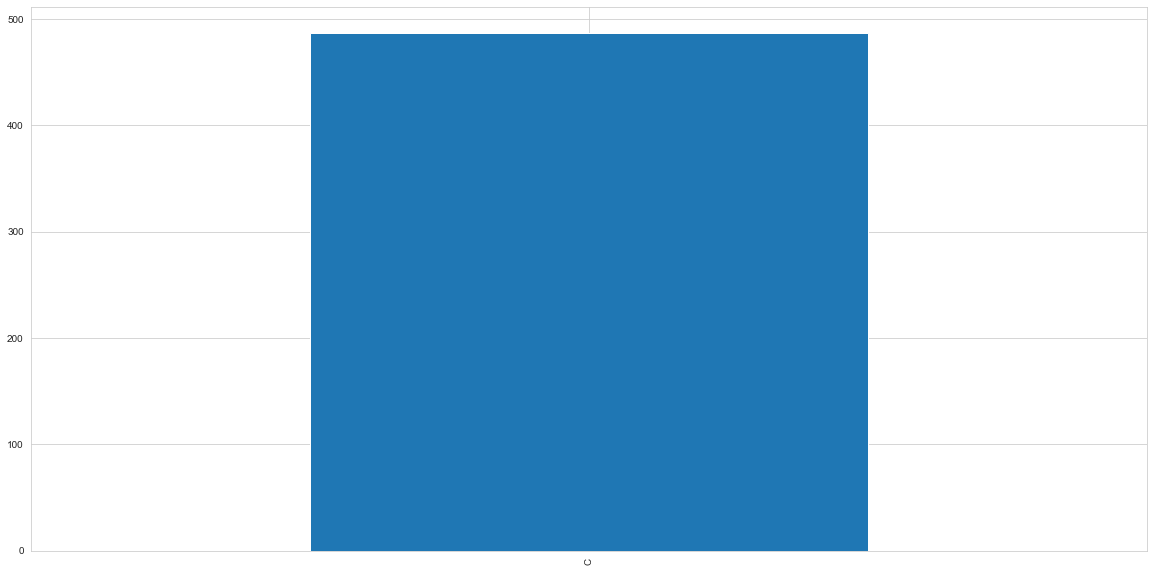

In [53]:
classified['value'].value_counts().plot(kind='bar')

### From above graph we can clearly see that most of clients fall under Category C which is aroun 380 from 708 unque clients. Around 265 clients fall under B category and remaining around 65 cleints fall in A category

In [54]:
# saving the output to a file
classified.to_csv("ABC_classification_Client_Sales.csv")